# 0x06 Regularization and Normalization

## 1. Regularization

Regularization is a technique used to prevent overfitting in machine learning models. 

In a nutshell, it adds a penalty term to the loss function, discouraging complex models that fit the training data too closely.

Before we dive into the regularization techniques, let us first construct a sample overfitted model.

We use such setup: Construct a dataset that is sampled from noisy sine wave, and then fit a polynomial regression model to it.

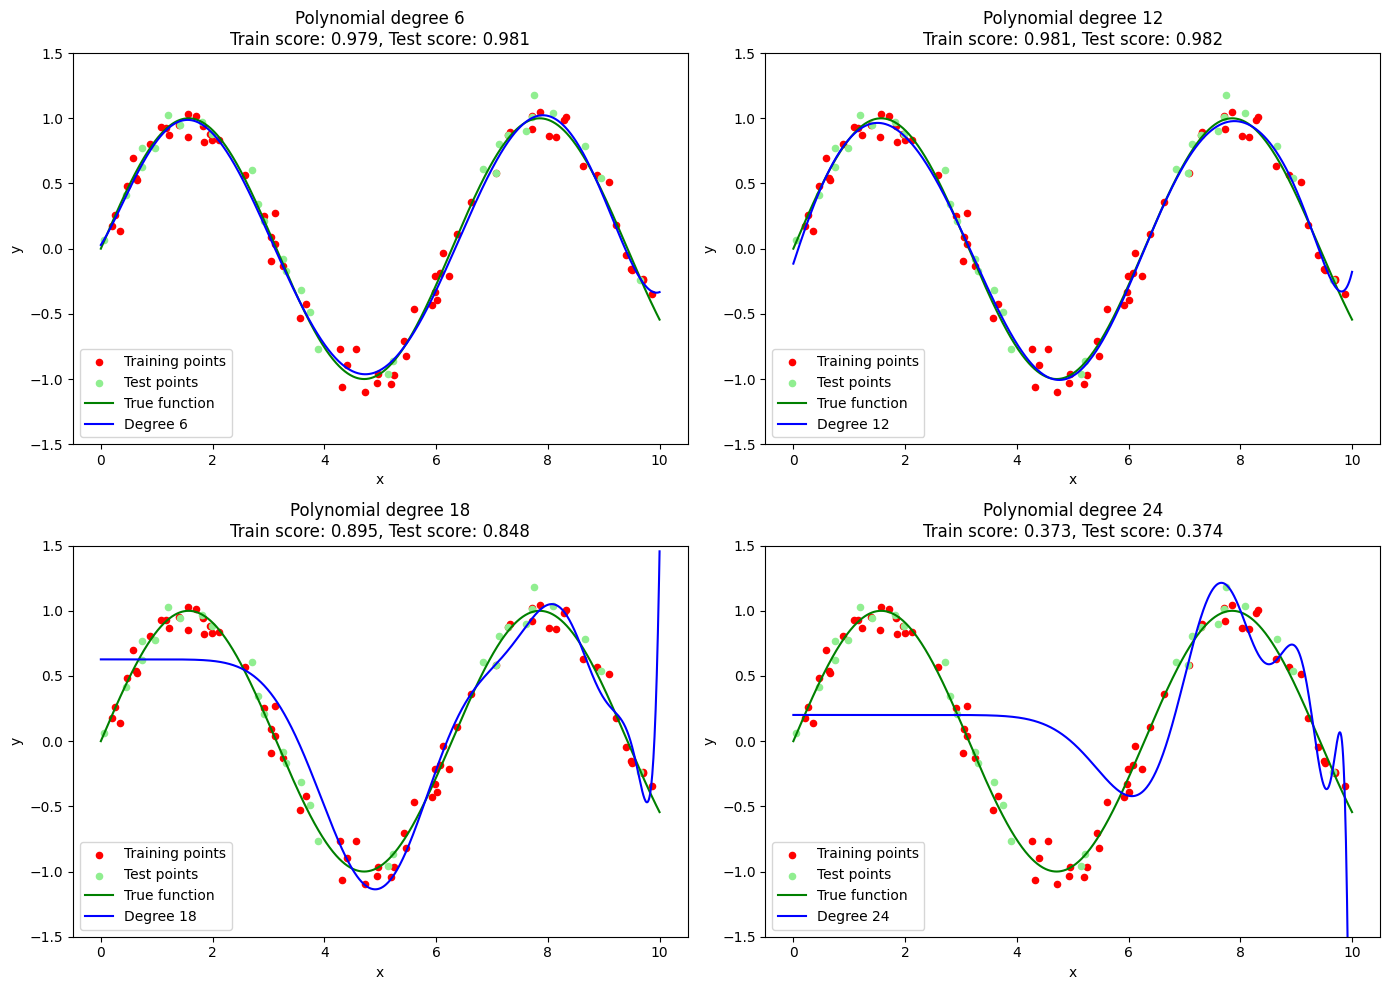

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate sine wave data with some noise
np.random.seed(42)
n_samples = 100
X = np.sort(np.random.uniform(0, 10, n_samples))[:, np.newaxis]
y = np.sin(X[:, 0]) + np.random.normal(0, 0.1, n_samples)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create models with different degrees of polynomial features
degrees = [6, 12, 18, 24]
models = [make_pipeline(PolynomialFeatures(degree), LinearRegression()) for degree in degrees]

# Fit models and calculate training and test scores
train_scores = []
test_scores = []
for model in models:
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

# Create fine-grained points for plotting the models' predictions
X_plot = np.linspace(0, 10, 1000)[:, np.newaxis]
y_plot = np.sin(X_plot[:, 0])  # True function without noise

# Plot the data and models
plt.figure(figsize=(14, 10))

for i, degree in enumerate(degrees):
    plt.subplot(2, 2, i+1)
    plt.scatter(X_train, y_train, color='red', s=20, label='Training points')
    plt.scatter(X_test, y_test, color='lightgreen', s=20, label='Test points')
    plt.plot(X_plot, y_plot, color='green', label='True function')
    
    y_pred = models[i].predict(X_plot)
    plt.plot(X_plot, y_pred, color='blue', label=f'Degree {degree}')
    
    plt.title(f"Polynomial degree {degree}\nTrain score: {train_scores[i]:.3f}, Test score: {test_scores[i]:.3f}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(-1.5, 1.5)
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

We can see that the model is overfitting the data when the degree goes up, as it captures the noise in the dataset. Let us pick the degree-24 polynomial as today's example.

In [13]:
deg24 = models[3]
print(deg24)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=24)),
                ('linearregression', LinearRegression())])


Today we will first take a look on L1 and L2 regularizations.

### 1.1 L1 and L2 Regularizations

L1 regularization, also known as Lasso regularization, adds a penalty equal to the absolute value of the magnitude of coefficients.
$$
L(w) = L_0(w) + \lambda \sum_{i=1}^{n} |w_i|
$$

where $L_0(w)$ is the original loss function, $w$ are the model parameters, and $\lambda$ is the regularization strength.

In sklearn, L1 regularization can be implemented using the `Lasso` class from the `sklearn.linear_model` module.

In [14]:
from sklearn.linear_model import Lasso
# Specify the regularization strength for Lasso using alpha
deg24_l1 = make_pipeline(PolynomialFeatures(24), Lasso(alpha=0.1, max_iter=1000))
print(deg24_l1)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=24)),
                ('lasso', Lasso(alpha=0.1))])


/Users/louishhy/Documents/GitHub/30min-of-deep-learning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.385e+00, tolerance: 3.083e-03
  model = cd_fast.enet_coordinate_descent(


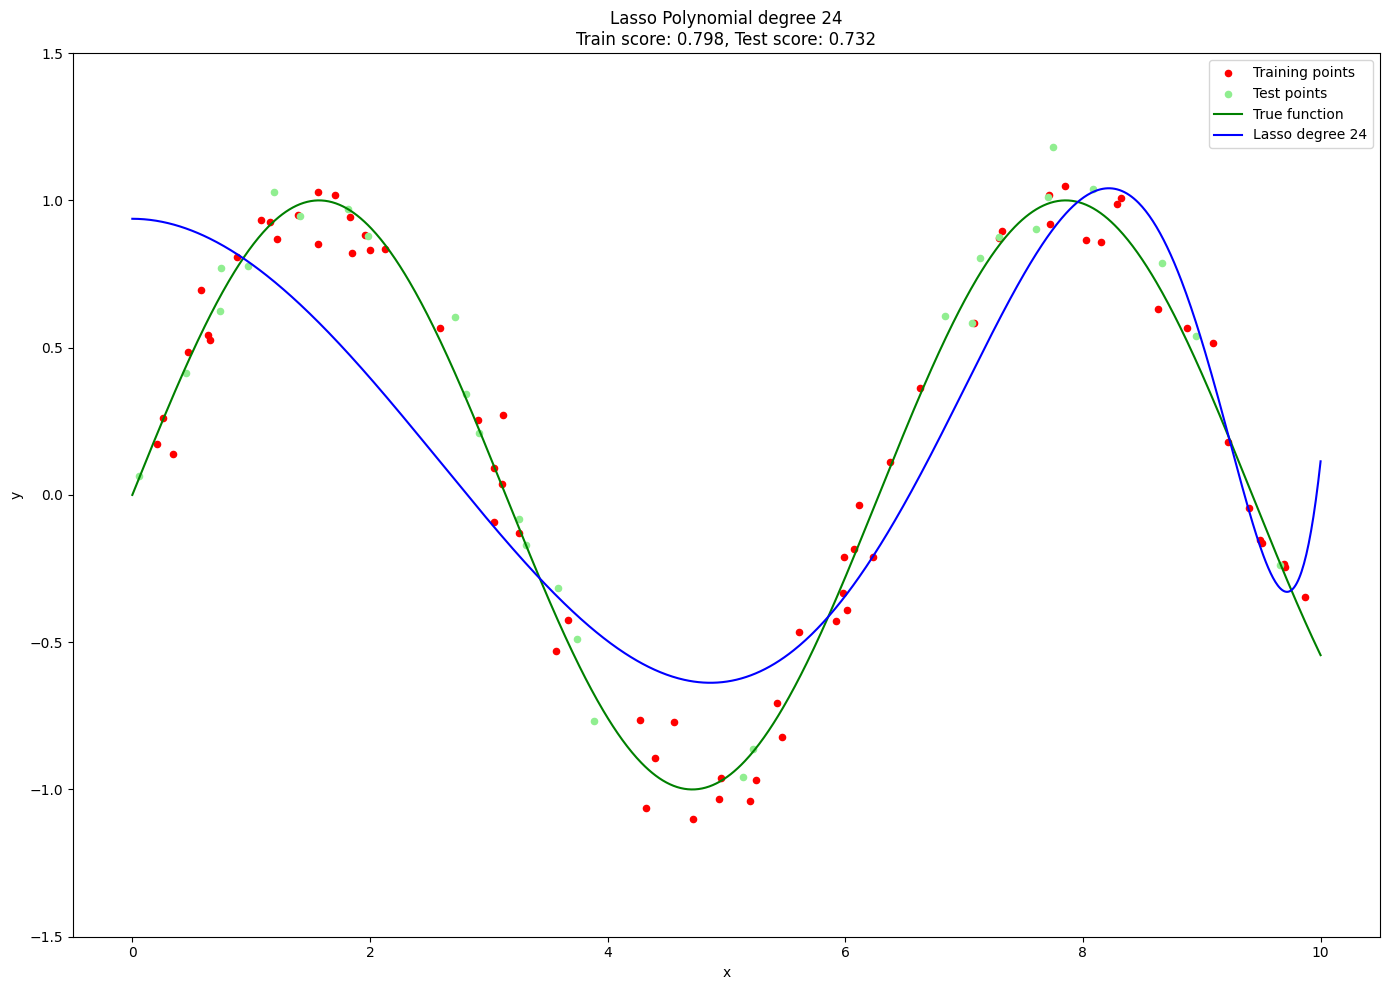

In [15]:
deg24_l1.fit(X_train, y_train)
y_pred_l1 = deg24_l1.predict(X_plot)
plt.figure(figsize=(14, 10))
plt.subplot(1, 1, 1)
plt.scatter(X_train, y_train, color='red', s=20, label='Training points')
plt.scatter(X_test, y_test, color='lightgreen', s=20, label='Test points')
plt.plot(X_plot, y_plot, color='green', label='True function')

plt.plot(X_plot, y_pred_l1, color='blue', label='Lasso degree 24')
plt.title(f"Lasso Polynomial degree 24\nTrain score: {deg24_l1.score(X_train, y_train):.3f}, Test score: {deg24_l1.score(X_test, y_test):.3f}")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1.5, 1.5)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

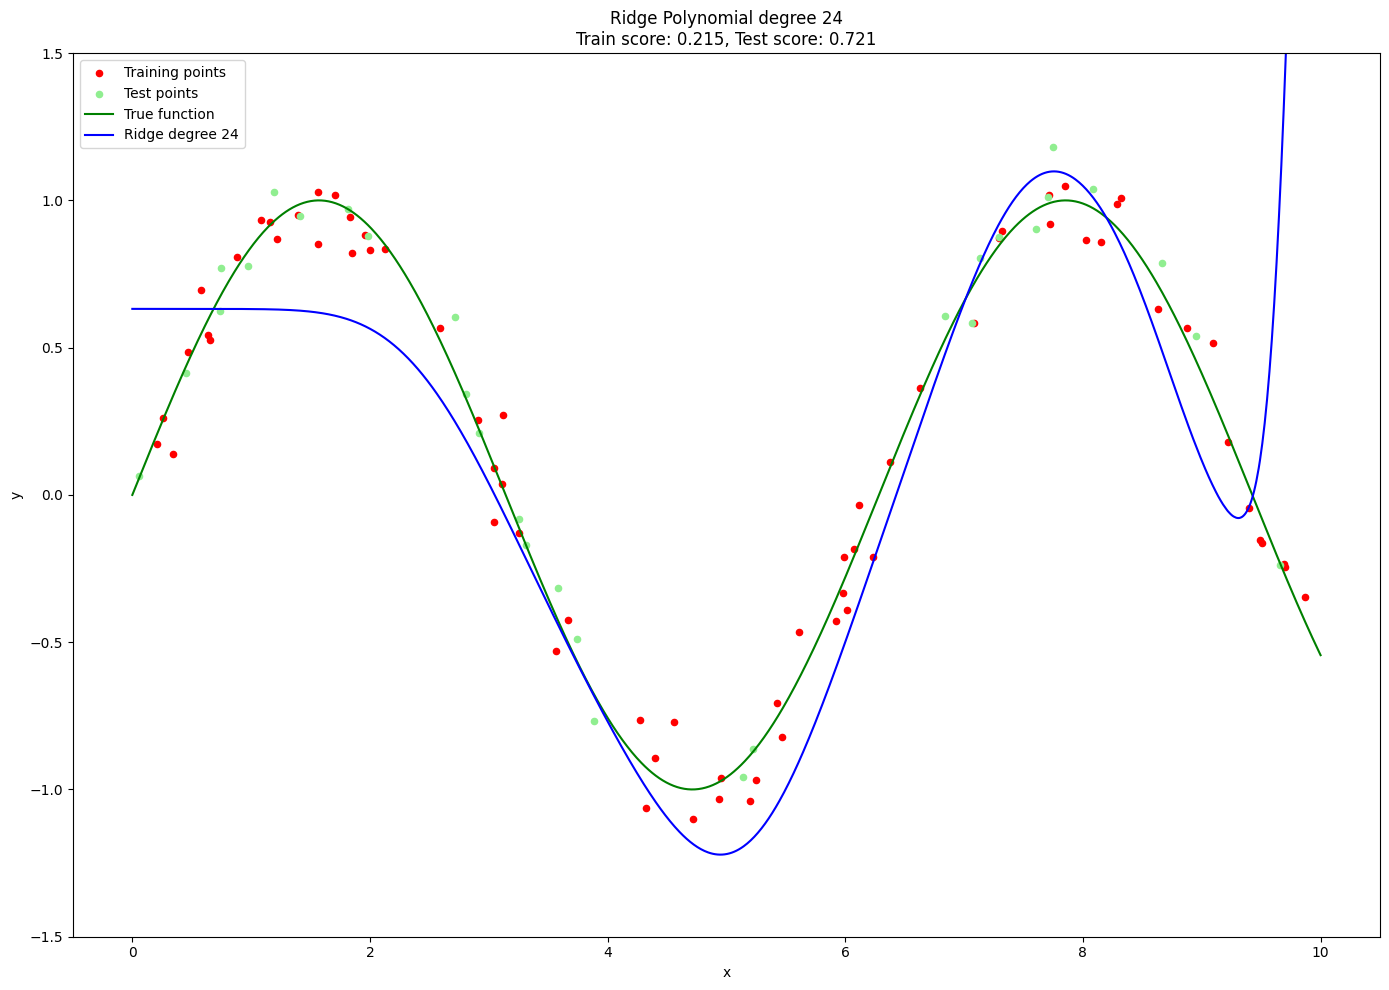

In [16]:
from sklearn.linear_model import Ridge

deg24_l2 = make_pipeline(PolynomialFeatures(24), Ridge(alpha=10000, max_iter=1000))
deg24_l2.fit(X_train, y_train)
y_pred_l2 = deg24_l2.predict(X_plot)
plt.figure(figsize=(14, 10))
plt.subplot(1, 1, 1)
plt.scatter(X_train, y_train, color='red', s=20, label='Training points')
plt.scatter(X_test, y_test, color='lightgreen', s=20, label='Test points')
plt.plot(X_plot, y_plot, color='green', label='True function')
plt.plot(X_plot, y_pred_l2, color='blue', label='Ridge degree 24')
plt.title(f"Ridge Polynomial degree 24\nTrain score: {deg24_l2.score(X_train, y_train):.3f}, Test score: {deg24_l2.score(X_test, y_test):.3f}")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1.5, 1.5)
plt.legend(loc='best')
plt.tight_layout()
plt.show()